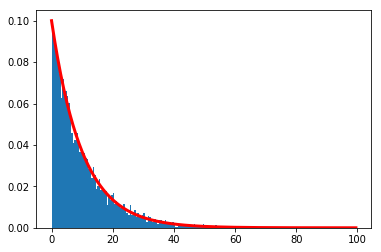

In [3]:
#########

#Non-uniform random distributions:

#Exponential distribution

%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 10000
r = np.random.random(N)

xlambda = 0.1
x = -np.log(r)/xlambda

binwidth=xlambda*5
pyplot.hist(x,bins=np.arange(0.,100., binwidth),density=True);
pyplot.plot(np.arange(0.,100.,binwidth),xlambda*np.exp(-xlambda*np.arange(0.,100.,binwidth)),ls='-',c='red',lw=3);

###



Acceptance Ratio:  0.1655
Acceptance Ratio:  0.1702


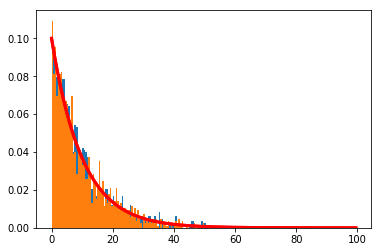

In [4]:
###von Neumann rejection

%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 10000

xmax = 60
ymax = xlambda

rx = np.random.random(N)*xmax
ry = np.random.random(N)*ymax

values = []

Nin = 0
for i in range(N):
    if(ry[i] <= xlambda*np.exp(-xlambda*rx[i])):
        # Accept
        values.append(rx[i])
        Nin += 1
        
x = np.asarray(values)

print("Acceptance Ratio: ",Nin/float(N))

binwidth=xlambda*5
#pyplot.hist(rx,bins=np.arange(0.,100., binwidth),density=True);
pyplot.hist(x,bins=np.arange(0.,100., binwidth),density=True);
pyplot.plot(np.arange(0.,100.,binwidth),xlambda*np.exp(-xlambda*np.arange(0.,100.,binwidth)),ls='-',c='red',lw=3);

#####

N = 10000

xmax = 60
ymax = xlambda

rx = np.random.random(N)*xmax
ry = np.random.random(N)*ymax

values = []

Nin = 0
for i in range(N):
    if(ry[i] <= xlambda*np.exp(-xlambda*rx[i])):
        # Accept
        values.append(rx[i])
        Nin += 1
        
x = np.asarray(values)

print("Acceptance Ratio: ",Nin/float(N))

binwidth=xlambda*5
#pyplot.hist(rx,bins=np.arange(0.,100., binwidth),density=True);
pyplot.hist(x,bins=np.arange(0.,100., binwidth),density=True);
pyplot.plot(np.arange(0.,100.,binwidth),xlambda*np.exp(-xlambda*np.arange(0.,100.,binwidth)),ls='-',c='red',lw=3);




Acceptance ratio =  0.96


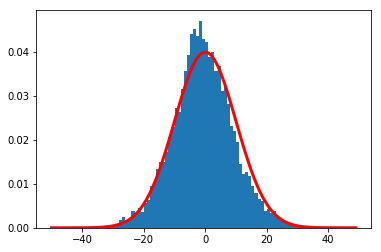

In [2]:
#####

%matplotlib inline
import numpy as np
from matplotlib import pyplot

#Exercise 1: 

N = 10000

x = np.zeros(N)
delta = 2.
sigma = 10.
sigma2 = sigma**2

Naccept=0 
def metropolis(xold):
    xtrial = np.random.random()    
    xtrial = xold+(2*xtrial-1)*delta
    weight = np.exp(-0.5*(xtrial**2-xold**2)/sigma2)
    xnew = xold
    if(weight >= 1): #Accept
        xnew = xtrial
    else:
        r = np.random.random()
        if(r <= weight): #Accept
            xnew = xtrial
    return xnew
# Only here to get a better starting point
xwalker = 20.
Nwarmup = 500000
for i in range(Nwarmup):
    xwalker = metropolis(xwalker)
###
x[0] = xwalker

for i in range(1,N):
    x0 = x[i-1]
    for j in range(10):
        x0 = metropolis(x0)
    x[i] = metropolis(x0)
    if (x[i]!=x0): # acceptance 
        Naccept+=1

binwidth=sigma/10
pyplot.hist(x,bins=np.arange(-50,50., binwidth),density=True);

norm = 1./(sigma*np.sqrt(2*np.pi))
pyplot.plot(np.arange(-50.,50.,binwidth),norm*np.exp(-0.5*np.arange(-50.,50.,binwidth)**2/sigma2),ls='-',c='red',lw=3);

######
# Acceptance ratio:
ratio=Naccept/N
print ('Acceptance ratio = ',ratio )


